Preprocessing danych. Niektóre kolumny nie mają wpływu na predykcję i je usuwamy. Trzeba też uzyc one-hot-encodingu do kolumn będących
kategoriami.

In [ ]:
import pandas as pd

df = pd.read_csv('data/titanic.csv')
df.head()
df = df[['Survived', 'Age', 'Sex', 'Pclass']]
df = pd.get_dummies(df, columns=['Sex', 'Pclass'])
df.dropna(inplace=True)
df.head()

Podzial danych na testowe i treningowe (80/20)

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [49]:
from sklearn.svm import SVC

model = SVC(kernel="rbf", probability=True, random_state=42)
model.fit(X_train, y_train)
print(f"RBF: {model.score(X_test, y_test)}")

RBF: 0.6153846153846154


In [50]:
from sklearn.svm import SVC

model = SVC(kernel="linear", probability=True, random_state=42)
model.fit(X_train, y_train)
print(f"Linear: {model.score(X_test, y_test)}")

Linear: 0.7832167832167832


In [51]:
from sklearn.svm import SVC

model = SVC(kernel="sigmoid", probability=True, random_state=42)
model.fit(X_train, y_train)
print(f"Sigmoid: {model.score(X_test, y_test)}")

Sigmoid: 0.5594405594405595


Wyniki dla domyslnych parametrow dla roznych funkcji jadra nie sa powalajace (56-78%)

Spróbuję sprawdzić różne wariancje funkcji jądra oraz parametrów, które mówią o tym jak bardzo chcemy unikać misklasyfikacji oraz jak bardzo odległe przypadki mają wpływać na decyzję. Daje to sprawdzenie 300 roznych wariancji modelu.

In [25]:
from sklearn.model_selection import GridSearchCV

model = SVC(probability=True, random_state=42)

param_grid = {
    'C': [0.5, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2)
grid_search.fit(X, y)

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ......................C=0.5, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.5, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.5, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.5, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.5, gamma=1, kernel=linear; total time=   0.1s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.5, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, k

In [26]:
print(grid_search.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [36]:
best_model.score(X_test, y_test)


0.8951048951048951

Najlepszy okazal sie model z funkcja jadra RBF oraz z C = 1 oraz gamma = 1. Skutecznosc wzrosla az do 89%. Mozna by pewnie zawężać jeszcze C oraz gamma aby uzyskac jeszcze wieksza dokladnosc.

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


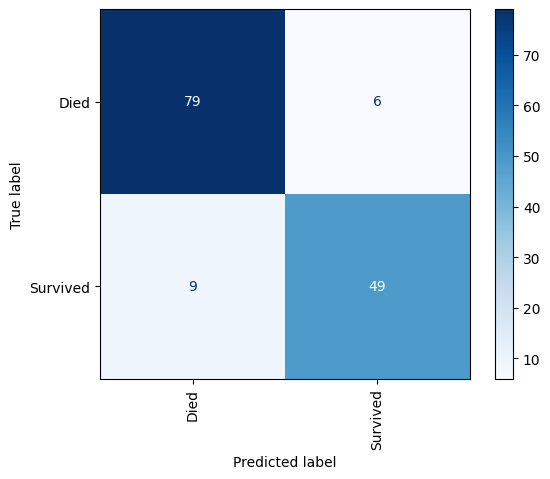

In [41]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_model, X_test, y_test, display_labels=['Died', 'Survived'], cmap='Blues', xticks_rotation='vertical')

Confusion matrix pokazujący rozklad TP, TN, FP oraz FN. W zależności od tego czy bardziej chcemy unikac FN czy tez FP mozna doostosowac model, nawet kosztem ogolnej skutecznosci.